### Nombre: Luis Rodolfo Bojorquez Pineda
### Matricula: A01250513
### Actividad: Actividad NLP - 1.0 - Creación de Diccionario

Importamos Librerias

In [3]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

Llamamos el libro que utilizaremos desde un link de Project Gutemberg

In [9]:
# URL del libro
url = "https://www.gutenberg.org/cache/epub/345/pg345.txt" #Dracula

# Descargar el contenido del libro
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
book_text = soup.get_text()

Generamos una funcion sencilla para el conteo de palabras e imprimir el resultado en un diccionario ordenado.

In [10]:
# Función para contar palabras
def contar_palabras_en_libro(texto):
    palabras = re.findall(r'\b\w+\b', texto.lower())
    conteo = Counter(palabras)
    return conteo

# Contar palabras en el libro
conteo_palabras = contar_palabras_en_libro(book_text)

# Ordenar el histograma por frecuencia de mayor a menor
conteo_ordenado = conteo_palabras.most_common()

# Imprimir el histograma
for palabra, frecuencia in conteo_ordenado:
    print(f'{palabra}: {frecuencia}')

the: 8103
and: 5973
i: 4846
to: 4748
of: 3756
a: 3013
he: 2581
in: 2571
that: 2502
it: 2188
was: 1881
as: 1602
for: 1564
we: 1561
is: 1525
you: 1486
his: 1471
me: 1455
not: 1430
with: 1334
my: 1262
all: 1183
be: 1133
so: 1109
at: 1098
on: 1084
but: 1075
have: 1069
her: 1059
had: 1039
him: 953
she: 817
there: 782
when: 777
s: 745
this: 676
which: 670
if: 660
from: 640
are: 607
said: 570
were: 552
then: 549
by: 544
or: 540
one: 507
no: 499
could: 492
do: 491
them: 474
they: 467
what: 467
us: 465
will: 463
up: 451
must: 450
some: 444
would: 432
may: 431
out: 431
shall: 428
can: 418
our: 411
now: 407
see: 398
been: 393
know: 392
time: 390
more: 377
an: 365
has: 347
come: 340
am: 337
over: 336
van: 323
helsing: 323
any: 322
night: 319
_: 315
your: 312
came: 309
went: 299
lucy: 297
like: 292
who: 289
only: 289
into: 288
go: 284
did: 283
before: 281
very: 280
here: 273
back: 260
good: 258
man: 256
down: 253
t: 250
again: 246
well: 245
even: 244
seemed: 243
about: 240
way: 233
such: 233
room: 

Ahora con la libreria WordCloud generamos una nube de palabras con el texto del libro.

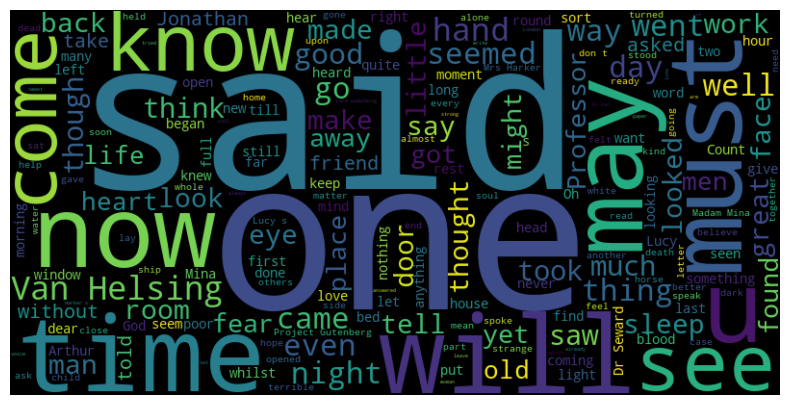

In [11]:
# Crear una instancia de WordCloud y generar la nube de palabras
wordcloud = WordCloud(width=800, height=400).generate(book_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Generamos una funcion para generar el diccionario de palabras que utilizaremos para el corrector ortografico.

In [12]:
# Función para crear un diccionario de palabras
def crear_diccionario(texto):
    palabras = set(re.findall(r'\b\w+\b', texto.lower()))
    return palabras

# Crear el diccionario
diccionario = crear_diccionario(book_text)

Utilizando la libreria difflib generamos una funcion para corregir palabras.

In [13]:
import difflib #Se utiliza la biblioteca difflib para calcular la distancia de Levenshtein entre palabras y encontrar sugerencias de corrección.

# Función para corregir texto usando el diccionario
def corregir_texto(texto, diccionario):
    palabras = re.findall(r'\b\w+\b', texto.lower())
    texto_corregido = []

    for palabra in palabras:
        mejor_coincidencia = difflib.get_close_matches(palabra, diccionario, n=1, cutoff=0.6)
        if mejor_coincidencia:
            texto_corregido.append(mejor_coincidencia[0])
        else:
            texto_corregido.append(palabra)

    return " ".join(texto_corregido)

# Texto de ejemplo a corregir
texto_ejemplo = "Ths is an exmple of text with sm typos."

# Corregir el texto utilizando el diccionario
texto_corregido = corregir_texto(texto_ejemplo, diccionario)
print("Texto corregido:", texto_corregido)

Texto corregido: thus is an example of texts with sum types


In [14]:
# Bonus

def distancia_levenshtein(str1, str2):
    len1, len2 = len(str1), len(str2)
    # Crear una matriz para almacenar la distancia
    matriz = [[0] * (len2 + 1) for _ in range(len1 + 1)]

    # Inicializar la primera fila y la primera columna
    for i in range(len1 + 1):
        matriz[i][0] = i
    for j in range(len2 + 1):
        matriz[0][j] = j

    # Calcular la distancia de Levenshtein
    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matriz[i][j] = min(
                matriz[i - 1][j] + 1,     # Eliminación
                matriz[i][j - 1] + 1,     # Inserción
                matriz[i - 1][j - 1] + cost  # Sustitución
            )

    return matriz[len1][len2]

# Ejemplo
palabra1 = "kitten"
palabra2 = "dog"
distancia = distancia_levenshtein(palabra1, palabra2)
print("Distancia de Levenshtein:", distancia)

Distancia de Levenshtein: 6
